#INSTALL YoloV5

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 10537, done.
remote: Total 10537 (delta 0), reused 0 (delta 0), pack-reused 10537
Receiving objects: 100% (10537/10537), 10.74 MiB | 28.78 MiB/s, done.
Resolving deltas: 100% (7279/7279), done.


In [1]:
%cd yolov5/

/content/yolov5


In [2]:
!pip install -U -r requirements.txt

#Proses Training

In [3]:
%cd /content
!unzip -q train_data.zip -d /content/

/content


In [4]:
%cd yolov5/

/content/yolov5


In [5]:
ls

CONTRIBUTING.md  Dockerfile  LICENSE    requirements.txt*  tutorial.ipynb
data/            export.py   models/    setup.cfg          utils/
detect.py        hubconf.py  README.md  train.py           val.py


In [6]:
!nvidia-smi

Fri Jan 14 11:57:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
#TRAIN YOLO DENGAN DATA BARU
!python train.py --img 640 --batch 12 --epoch 60 --data data/fireDetection.yaml --weights yolov5x.pt --nosave --cache

train: weights=yolov5x.pt, cfg=, data=data/fireDetection.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=60, batch_size=12, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-190-ge7bf382 torch 1.10.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s

# Test Deteksi Objek

In [40]:
!python detect.py --source ./data/images --weights fireDetection.pt --conf 0.4

detect: weights=['fireDetection.pt'], source=./data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-190-ge7bf382 torch 1.10.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/2 /content/yolov5/data/images/fire.jpg: 640x640 1 fire, Done. (0.101s)
image 2/2 /content/yolov5/data/images/fire2.jpg: 384x640 2 fires, Done. (0.054s)
Speed: 0.6ms pre-process, 77.5ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


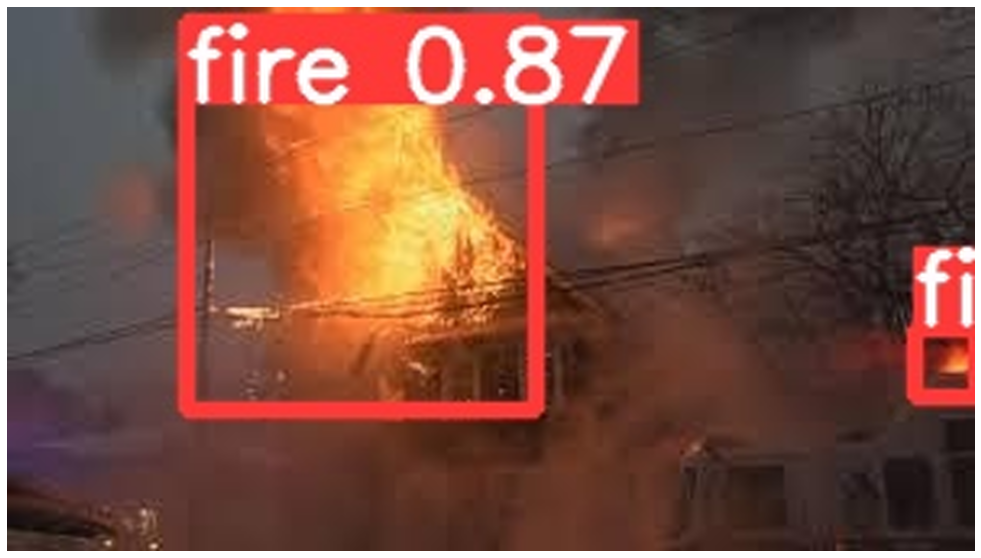

In [20]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('/content/yolov5/runs/detect/exp/fire2.jpg')
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()